<a href="https://colab.research.google.com/github/Barbozah/AprendizagemDeMaquina/blob/master/Usando_o_SpaCy_pra_um_tratamento_NPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!python -m spacy download pt

     |████████████████████████████████| 12.9MB 4.1MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.1.0-cp36-none-any.whl size=12843677 sha256=aa67ebd0979f5b9c0d932d535037750afa9b831a31d725ab6b73da0d2b4b5a57
  Stored in directory: /tmp/pip-ephem-wheel-cache-k8zjaraa/wheels/a3/8f/c1/f036e3a7f1aa44fb06a534c6c4b1c2b773f101fdb1f163c08c
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [0]:
import spacy

In [0]:
nlp = spacy.load('pt')
texto = nlp(
    """O mundo é um lugar duro, Danny. Não se importa com a gente. 
    Não odeia a você, nem a mim, mas também não morre de amor por 
    nós. Coisas terríveis acontecem no mundo, e são coisas que 
    ninguém pode explicar. Indivíduos bons morrem de forma ruim e 
    dolorosa e deixam as pessoas que os amam sozinhas. Às vezes, 
    parece que só as pessoas ruins permanecem sadias e prósperas. 
    O mundo não ama você, mas sua mãe o ama e eu também.""")

In [0]:
%%capture
palavras = [token.orth_ for token in texto if not token.is_punct]
verbos = [token.orth_ for token in texto if token.pos_ == 'VERB']
verbos_infinitivo = [token.lemma_ for token in texto if token.pos_ == 'VERB']
pontuacoes = [token.orth_ for token in texto if token.is_punct]
sentencas = [sents for sents in texto.sents]
tipos = [(ent, ent.label_) for ent in texto.ents]

def heatmap(texto):
    similaridades = []
    labels = []
    for s in texto:
        colunas = []
        l = []
        for token1 in s:
            if token1.is_punct or not str(token1.orth_).strip():
                continue
            l.append(str(token1))
            linha = []
            for token2 in s:
                if token2.is_punct or not str(token2.orth_).strip():
                    continue
                linha.append(token1.similarity(token2))
            colunas.append(linha)
        labels.append(l)
        similaridades.append(colunas)
    return similaridades, labels

similaridades, labels = heatmap(sentencas)

In [0]:
print(f'Palavras: {palavras}')
print(f'Verbos: {verbos}')
print(f'Verbos no infinitivo: {verbos_infinitivo}')
print(f'Pontuações: {pontuacoes}')
print(f'Sentenças: {sentencas}')
print(f'Entidades e seus tipos: {tipos}')

Palavras: ['O', 'mundo', 'é', 'um', 'lugar', 'duro', 'Danny', 'Não', 'se', 'importa', 'com', 'a', 'gente', 'Não', 'odeia', 'a', 'você', 'nem', 'a', 'mim', 'mas', 'também', 'não', 'morre', 'de', 'amor', 'por', 'nós', 'Coisas', 'terríveis', 'acontecem', 'no', 'mundo', 'e', 'são', 'coisas', 'que', 'ninguém', 'pode', 'explicar', 'Indivíduos', 'bons', 'morrem', 'de', 'forma', 'ruim', 'e', 'dolorosa', 'e', 'deixam', 'as', 'pessoas', 'que', 'os', 'amam', 'sozinhas', 'Às', 'vezes', 'parece', 'que', 'só', 'as', 'pessoas', 'ruins', 'permanecem', 'sadias', 'e', 'prósperas', 'O', 'mundo', 'não', 'ama', 'você', 'mas', 'sua', 'mãe', 'o', 'ama', 'e', 'eu', 'também']
Verbos: ['é', 'importa', 'odeia', 'morre', 'acontecem', 'são', 'explicar', 'morrem', 'deixam', 'amam', 'parece', 'permanecem', 'ama']
Verbos no infinitivo: ['ser', 'importar', 'odiar', 'morrer', 'acontecer', 'ser', 'explicar', 'morrer', 'deixar', 'amar', 'parecer', 'permanecer', 'amo']
Pontuações: [',', '.', '.', ',', ',', '.', ',', '.', 

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

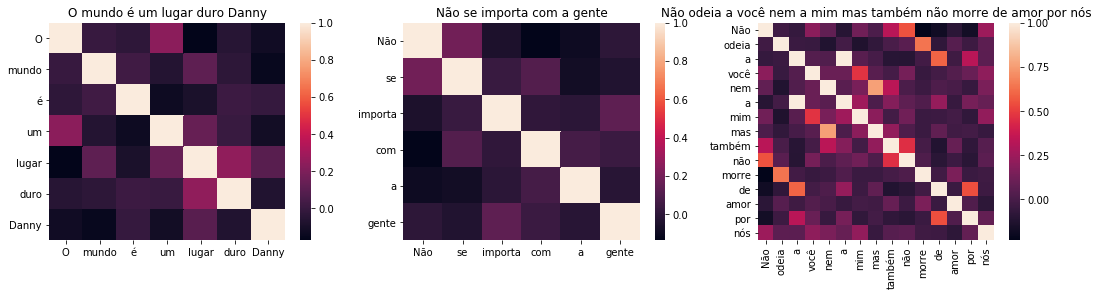

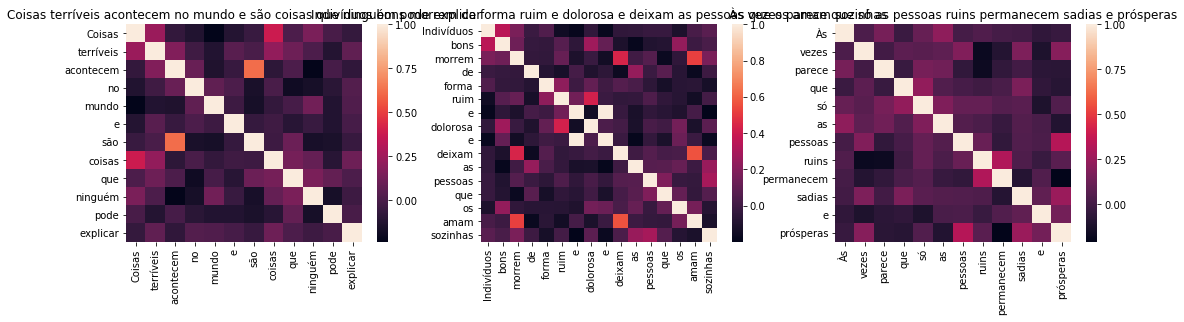

In [0]:
dfs = [pd.DataFrame(s, index=l, columns=l) for s, l in zip(similaridades,labels)]
for x in range(len(dfs)//3):
    _, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
    ax[0].set_title(' '.join(labels[3*x]))
    sns.heatmap(dfs[3*x], ax=ax[0])
    ax[1].set_title(' '.join(labels[3*x+1]))
    sns.heatmap(dfs[3*x+1], ax=ax[1])
    ax[2].set_title(' '.join(labels[3*x+2]))
    sns.heatmap(dfs[3*x+2], ax=ax[2])